---
---
# Convolutional Neural Network
---
---

## Libraries Imports

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
#import tensorflow and keras
import tensorflow as tf
import keras
from keras import models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import kerastuner as kt
from keras.optimizers import Adam

#import pandas and matplotlib for accurcy visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

<ipython-input-2-5ccac7c9d001>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


## Loading Data

The above method truly shines when used with big images and especially multi-channel images

**The CIFAR-100** dataset is a well-known dataset used in machine learning and computer vision for evaluating image recognition algorithms. It is a more complex and diverse dataset compared to its counterpart, CIFAR-10, primarily due to the larger number of classes.

![Cifar100](https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-100-dataset-Activeloop-Platform-visualization-image.webp)

>- CIFAR-100 contains 60,000 32x32 color images.
>- The images are divided into 100 classes, each containing 600 images.
>- The 100 classes are grouped into 20 superclasses.
>- Each superclass encompasses several classes that are more specific; for example, the "aquatic mammals" superclass includes classes like "beaver", "dolphin", and "otter".

In [ ]:
# Loading the Dataset from Keras
cifar = datasets.cifar100
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data(label_mode='coarse')

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Transformed images (Before preprocessing):


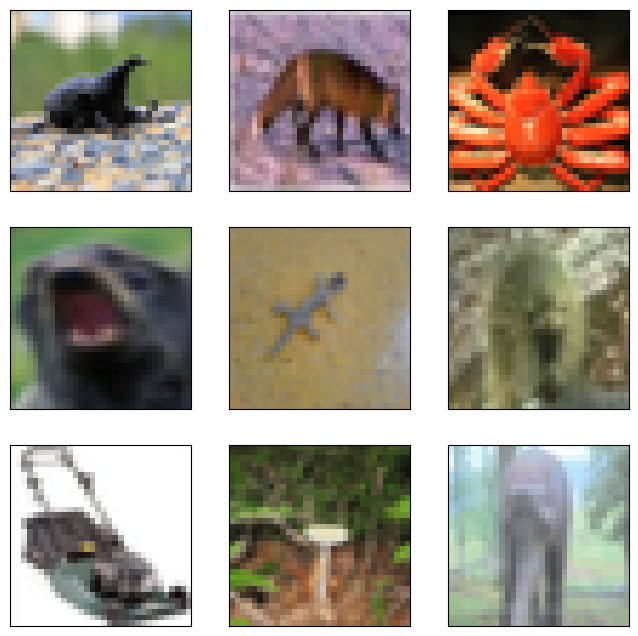

In [ ]:
print("Transformed images (Before preprocessing):")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Image Preprocessing

Applying preprocessing

In [ ]:
# Define an ImageDataGenerator with normalization and data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

## Modeling

In [ ]:
model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    # Convolutional layer 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # Flattening followed by Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(20, activation='softmax')  # Output layer with 20 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    batch_size=2000,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


719/719 - 52s - 72ms/step - accuracy: 0.2060 - loss: 2.7420 - val_accuracy: 0.0500 - val_loss: 289913.6250
Epoch 2/10
719/719 - 67s - 93ms/step - accuracy: 0.2949 - loss: 2.2890 - val_accuracy: 0.0622 - val_loss: 169749.4375
Epoch 3/10
719/719 - 32s - 44ms/step - accuracy: 0.3422 - loss: 2.1215 - val_accuracy: 0.0737 - val_loss: 139874.7656
Epoch 4/10
719/719 - 41s - 57ms/step - accuracy: 0.3725 - loss: 2.0244 - val_accuracy: 0.0836 - val_loss: 130945.4844
Epoch 5/10
719/719 - 42s - 58ms/step - accuracy: 0.3945 - loss: 1.9428 - val_accuracy: 0.0803 - val_loss: 178533.9844
Epoch 6/10
719/719 - 32s - 44ms/step - accuracy: 0.4162 - loss: 1.8734 - val_accuracy: 0.0873 - val_loss: 114959.3594
Epoch 7/10
719/719 - 41s - 57ms/step - accuracy: 0.4282 - loss: 1.8260 - val_accuracy: 0.0914 - val_loss: 112624.1406
Epoch 8/10
719/719 - 42s - 58ms/step - accuracy: 0.4418 - loss: 1.7829 - val_accuracy: 0.0855 - val_loss: 174333.6719
Epoch 9/10
719/719 - 41s - 57ms/step - accuracy: 0.4557 - loss: 1.7

## Data Augmentation Finetuning

Defines the model that will be used for the search effort(make the model simple since searching a space of paramters is already time consuming)

In [ ]:
def model_builder(hp):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(),
        Flatten(),
        Dense(20, activation='softmax')
    ])
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Build your ImageDataGenerator and define your search ranges

In [ ]:
def build_datagen(hp):
    return ImageDataGenerator(
        rotation_range=hp.Int('rotation_range', min_value=0, max_value=90, step=10),
        width_shift_range=hp.Float('width_shift_range', min_value=0.0, max_value=0.3, step=0.05),
        height_shift_range=hp.Float('height_shift_range', min_value=0.0, max_value=0.3, step=0.05),
        zoom_range=hp.Float('zoom_range', min_value=0.0, max_value=0.3, step=0.05),
        horizontal_flip=hp.Boolean('horizontal_flip'),
        rescale=1./255
    )

In [ ]:
def train_test_model(hp):
    datagen = build_datagen(hp)
    datagen.fit(X_train)
    model = model_builder(hp)
    model.fit(datagen.flow(X_train, y_train, batch_size=64),
                     validation_data=(X_test / 255.0, y_test),
                     epochs=10, verbose=0)
    return model

**Random search** is a technique used in hyperparameter optimization where different combinations of hyperparameters are tested in a stochastic manner, rather than systematically. This method involves defining a range or a distribution for each hyperparameter and then randomly selecting values from these definitions to evaluate the performance of a model.

### Key Features of Random Search:
- **Simplicity**: It is straightforward to implement as it randomly samples hyperparameters from a specified range or distribution.
- **Efficiency**: Random search can be more effective than grid search, especially when dealing with high-dimensional space, because it does not require a complete exploration of all combinations. This can lead to finding good hyperparameters faster because it doesn't waste time evaluating unpromising regions of the hyperparameter space.
- **Scalability**: It scales well with the complexity of the problem as increasing the number of hyperparameters does not exponentially increase the search effort, unlike grid search.

In [ ]:
tuner = kt.RandomSearch(
    train_test_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='auto_tune_aug',
    project_name='augmentation_tuning'
)

In [ ]:
tuner.search()


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0                 |0                 |rotation_range
0.1               |0.1               |width_shift_range
0.05              |0.05              |height_shift_range
0.25              |0.25              |zoom_range
False             |False             |horizontal_flip



**Excerise:**

>- Try to manually tune the data augmentation based on your understanding
>- Try other searching/Tuning methods within the keras tuner other than random search